In [12]:
# データモデルの準備
import numpy as npy

# データ生成
xnum = 8
views =[235,375,568,931,1497,1542,3176,2155]
users =[24,93,154,370,746,868,1809,1308]
session =[103,221,306,539,1010,1127,2307,1587]

# データをblog_data.npzファイルに保存する
npy.savez('blog_data2.npz',X=users,X_min=min(users),X_max=max(users),X_n=len(users),Y=views,Z=session)

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('blog_data2.npz')

print(sample_data['X'])
print(sample_data['Z'])


[  24   93  154  370  746  868 1809 1308]
[ 103  221  306  539 1010 1127 2307 1587]


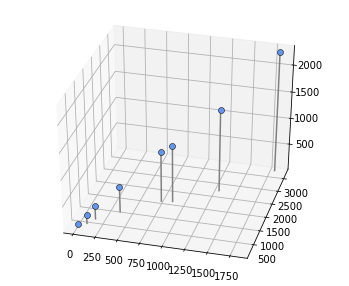

In [13]:
# データモデルの準備
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def show_model(ax, X, Y, Z):
    for i in range(len(X)):
        ax.plot([X[i],X[i]],[Y[i],Y[i]],[50,Z[i]],color='gray')
        
    ax.plot(X,Y,Z,'o',color='cornflowerblue',markeredgecolor='black',markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=-75)


# データをblog_data2.npzファイルから取り出す
sample_data = npy.load('blog_data2.npz')

plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_model(ax, sample_data['X'], sample_data['Y'], sample_data['Z'])
plt.show()



SD=160.07 cm


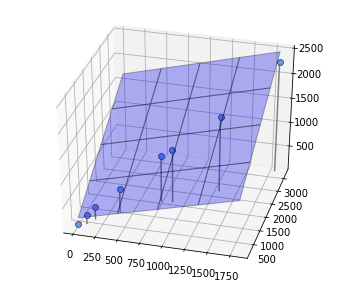

In [17]:
# データモデルの準備
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# データプロット
def show_model(ax, X, Y, Z):
    for i in range(len(X)):
        ax.plot([X[i],X[i]],[Y[i],Y[i]],[50,Z[i]],color='gray')
        
    ax.plot(X,Y,Z,'o',color='cornflowerblue',markeredgecolor='black',markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=-75)

# 面を生成
def show_plane(ax, w):
    px =npy.linspace(X_min, X_max, 5)
    py =npy.linspace(Y_min, Y_max, 5)
    px, py = npy.meshgrid(px, py)
    y = w[0]*px + w[1]*py + w[2]
    ax.plot_surface(px, py, y, rstride=1,cstride=1,alpha=0.3,color='blue',edgecolor='black')

# 二乗誤差
def mse_plane(X,Y,Z,w):
    y = w[0]*X + w[1]*Y +w[2]
    mse = npy.mean((y - Z)**2)
    return mse

# データをblog_data2.npzファイルから取り出す
sample_data = npy.load('blog_data2.npz')
X=sample_data['X']
Y=sample_data['Y']
Z=sample_data['Z']
X_min = min(X)
X_max = max(X)
Y_min = min(Y)
Y_max = max(Y)

plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection='3d')
W=[0.45,0.5,100]
show_plane(ax, W)
show_model(ax, X,Y,Z)
mse = mse_plane(X,Y,Z,W)
print("SD={0:.2f} cm".format(npy.sqrt(mse)))
plt.show()


w0=0.7,w1=0.3,w2=7.7
SD=18.35 cm


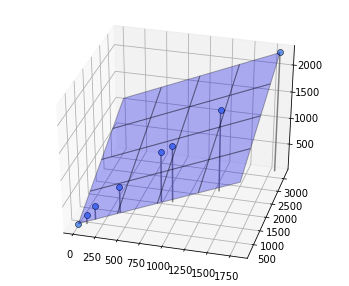

In [5]:
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# データプロット
def show_model(ax, X, Y, Z):
    for i in range(len(X)):
        ax.plot([X[i],X[i]],[Y[i],Y[i]],[50,Z[i]],color='gray')
        
    ax.plot(X,Y,Z,'o',color='cornflowerblue',markeredgecolor='black',markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=-75)

# 面を生成
def show_plane(ax, w):
    px =npy.linspace(X_min, X_max, 5)
    py =npy.linspace(Y_min, Y_max, 5)
    px, py = npy.meshgrid(px, py)
    y = w[0]*px + w[1]*py + w[2]
    ax.plot_surface(px, py, y, rstride=1,cstride=1,alpha=0.3,color='blue',edgecolor='black')

# 二乗誤差
def mse_plane(X,Y,Z,w):
    y = w[0]*X + w[1]*Y +w[2]
    mse = npy.mean((y - Z)**2)
    return mse

# 共分散
def cov_func(a,b):
    return npy.mean(a*b) - npy.mean(a)*npy.mean(b)

# 解析解の導出関数
def fit_plane(x,y,z):
    cov_zx = cov_func(z, x)
    cov_zy = cov_func(z, y)
    cov_xy = cov_func(x, y)
    var_x = npy.var(x)
    var_y = npy.var(y)
    w0 = (cov_zy*cov_xy - var_y*cov_zx)/(cov_xy**2 - var_x*var_y)
    w1 = (cov_zx*cov_xy - var_x*cov_zy)/(cov_xy**2 - var_x*var_y)
    w2 = -w0*npy.mean(x) - w1*npy.mean(y) + npy.mean(z)
    return npy.array([w0, w1, w2])

# データをblog_data2.npzファイルから取り出す
sample_data = npy.load('blog_data2.npz')
X=sample_data['X']
Y=sample_data['Y']
Z=sample_data['Z']
X_min = min(X)
X_max = max(X)
Y_min = min(Y)
Y_max = max(Y)

plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection='3d')
W = fit_plane(X,Y,Z)
print("w0={0:.1f},w1={1:.1f},w2={2:.1f}".format(W[0],W[1],W[2]))

show_plane(ax, W)
show_model(ax, X, Y, Z)
mse = mse_plane(X, Y, Z, W)

print("SD={0:.2f} cm".format(npy.sqrt(mse)))
plt.show()
